In [1]:
import alphashape
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon, Point
import numpy as np

In [2]:
def compute_alphashape_from_pts(points, alpha):
    """
    Compute the alphashape of a 2D point cloud and return as a MultiPolygon.

    Parameters:
    - points: Nx2 numpy array or list of (x, y) pairs
    - alpha: float, shape detail level (smaller → tighter shape)

    Returns:
    - A shapely MultiPolygon (even if result is a single polygon)
    """
    # Compute the alpha shape (may return Polygon or MultiPolygon)
    alpha_shape = alphashape.alphashape(points, alpha)

    # Ensure result is a MultiPolygon
    if isinstance(alpha_shape, Polygon):
        return MultiPolygon([alpha_shape])
    elif isinstance(alpha_shape, MultiPolygon):
        return alpha_shape
    else:
        raise TypeError("Unexpected geometry type returned by alphashape")

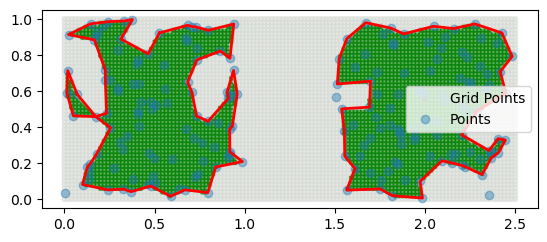

In [3]:
# Generate some scattered points
np.random.seed(50)
pts1 = np.random.rand(100, 2)
pts2 = np.random.rand(100, 2)+[1.5,0]
pts = np.vstack([pts1, pts2])

# Compute multipolygon alphashape
mpoly = compute_alphashape_from_pts(pts, alpha=10)

# Create a grid of points (e.g., 100×100 in same domain)
x = np.linspace(0, 2.5, 125)
y = np.linspace(0, 1.0, 50)
xx, yy = np.meshgrid(x, y)
grid_points = np.column_stack([xx.ravel(), yy.ravel()])

# Test which points are inside or touch the multipolygon
colors = []
for pt in grid_points:
    point = Point(pt)
    if mpoly.contains(point) or mpoly.touches(point):
        colors.append('green')
    else:
        colors.append('xkcd:light gray')

# Plot it
fig, ax = plt.subplots()
ax.scatter(grid_points[:, 0], grid_points[:, 1], c=colors, s=10, alpha=0.6, label='Grid Points')
ax.plot(pts[:, 0], pts[:, 1], 'o', alpha=0.4, label='Points')

for poly in mpoly.geoms:
    x, y = poly.exterior.xy
    ax.plot(x, y, color='red', lw=2)

ax.set_aspect('equal')
ax.legend()
plt.show()